Using the sdeint package, we will simulate realizations of the lambda-omega system with different levels of noise in the x coordinate and different levels of lambda and b parameters, obtaining the same cycle limits.

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

import sdeint
from scipy.integrate import solve_ivp

from tqdm import tqdm, auto
from tqdm.notebook import tqdm

In [9]:
def realization_with_params_and_time(l, o, a, b, sigma, tfin, tstep):
    tspan = np.linspace(0.0, tfin, int(tfin/tstep + 1))
    X0 = np.array([1, 0.0])

    params_F = [l, o, a, b]

    params_G = [np.diag([sigma, 0.0])]

    return sdeint.itoint(close(F,*params_F) , close(G, *params_G), X0, tspan)

def close(func, *args):
    def newfunc(x, t):
        return func(x, t, *args)
    return newfunc

def F(X, t, l, o, a, b):
    
    x = X[0]
    y = X[1]
    
    r2 = x**2 + y**2
    
    dx = x*(l - b*r2) - y*(o + a*r2)
    dy = x*(o + a*r2) + y*(l - b*r2)
    
    return np.array([dx, dy])

def G(X, t, B):
    return B

In [13]:
def mean_trajectory(trajs):
    N = len(trajs)
    x_vals = np.zeros((len(trajs[0]),N))
    y_vals = np.zeros((len(trajs[0]),N))
    #Extract x coordinate
    for i, x in enumerate(trajs):
        x_vals[:,i] = x[:,0]
        y_vals[:,i] = x[:,1]    
    #calculate mean trajectory
    mean_traj_x = np.mean(x_vals, axis = 1)
    mean_traj_y = np.mean(y_vals, axis = 1)
    
    #calculates the mean root mean square deviation for the complete set
    #rms = 0
    #x_diff = (x_vals - mean_traj_x.reshape(len(x_vals),1))**2
    #y_diff = (y_vals - mean_traj_y.reshape(len(y_vals),1))**2
    #return [mean_traj_x, mean_traj_y, x_diff, y_diff]
    return [mean_traj_x, mean_traj_y]

In [71]:
np.random.seed(42)

lams = [0.1, 0.25, 1, 2.5, 10]
sigmas = [0.01, 0.05, 0.1, 0.5, 1]

rs_lam = {}

for lam in lams:
    for sigma in sigmas:
        rs = []
        for _ in range(5000):
            r = realization_with_params_and_time(lam, 1, 1, lam, sigma, 10, 0.01)
            rs.append(r)
        print(lam, sigma, 'Done!')
        rs_lam[(lam, sigma)] = rs

0.1 0.01 Done!
0.1 0.05 Done!
0.1 0.1 Done!
0.1 0.5 Done!
0.1 1 Done!
0.25 0.01 Done!
0.25 0.05 Done!
0.25 0.1 Done!
0.25 0.5 Done!
0.25 1 Done!
1 0.01 Done!
1 0.05 Done!
1 0.1 Done!
1 0.5 Done!
1 1 Done!
2.5 0.01 Done!
2.5 0.05 Done!
2.5 0.1 Done!
2.5 0.5 Done!
2.5 1 Done!
10 0.01 Done!
10 0.05 Done!
10 0.1 Done!
10 0.5 Done!
10 1 Done!


In [72]:
mean_trajectories_r = {}
for r in rs_lam.keys():
    mean_trajectories_r[r] = mean_trajectory(rs_lam[r])

We will average all the trajectories for each combination, obtaining "mean path" which will be transformed from the original cycle to mean 0, due to the desynchronization produced by the white noise. The dynamics of this transformation encodes the amount of noise and the value of lambda

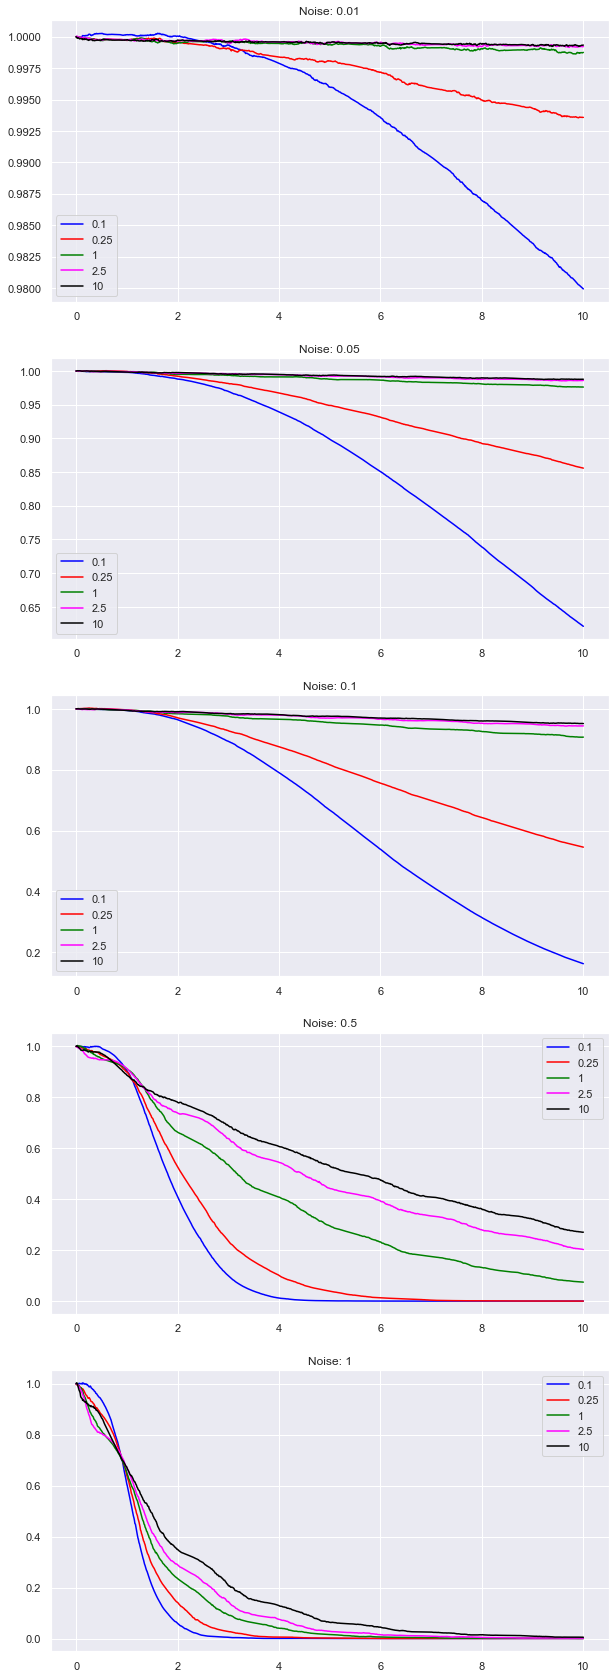

In [73]:
fig, axs = plt.subplots(5, figsize = (10,30))

t = np.linspace(0,10, int(10/0.01) + 1)

for i, r in enumerate(mean_trajectories_r):
    if r[0] == 0.1:
        color = 'blue'
    elif r[0] == 0.25:
        color = 'red'
    elif r[0] == 1:
        color = 'green'
    elif r[0] == 2.5:
        color = 'magenta'
    elif r[0] == 10:
        color = 'black'
        
    if r[1] == 0.01:
        axs[0].plot(t, mean_trajectories_r[r][0]**2 + mean_trajectories_r[r][1]**2, label = r[0], color = color)
        axs[0].title.set_text('Noise: ' + str(r[1]))
    if r[1] == 0.05:
        axs[1].plot(t, mean_trajectories_r[r][0]**2 + mean_trajectories_r[r][1]**2, label = r[0], color = color)
        axs[1].title.set_text('Noise: ' + str(r[1]))
    if r[1] == 0.1:
        axs[2].plot(t, mean_trajectories_r[r][0]**2 + mean_trajectories_r[r][1]**2, label = r[0], color = color)
        axs[2].title.set_text('Noise: ' + str(r[1]))
    if r[1] == 0.5:
        axs[3].plot(t, mean_trajectories_r[r][0]**2 + mean_trajectories_r[r][1]**2, label = r[0], color = color)
        axs[3].title.set_text('Noise: ' + str(r[1]))
    if r[1] == 1:
        axs[4].plot(t, mean_trajectories_r[r][0]**2 + mean_trajectories_r[r][1]**2, label = r[0], color = color)
        axs[4].title.set_text('Noise: ' + str(r[1]))

for i in range(5):
    axs[i].legend()

plt.show()

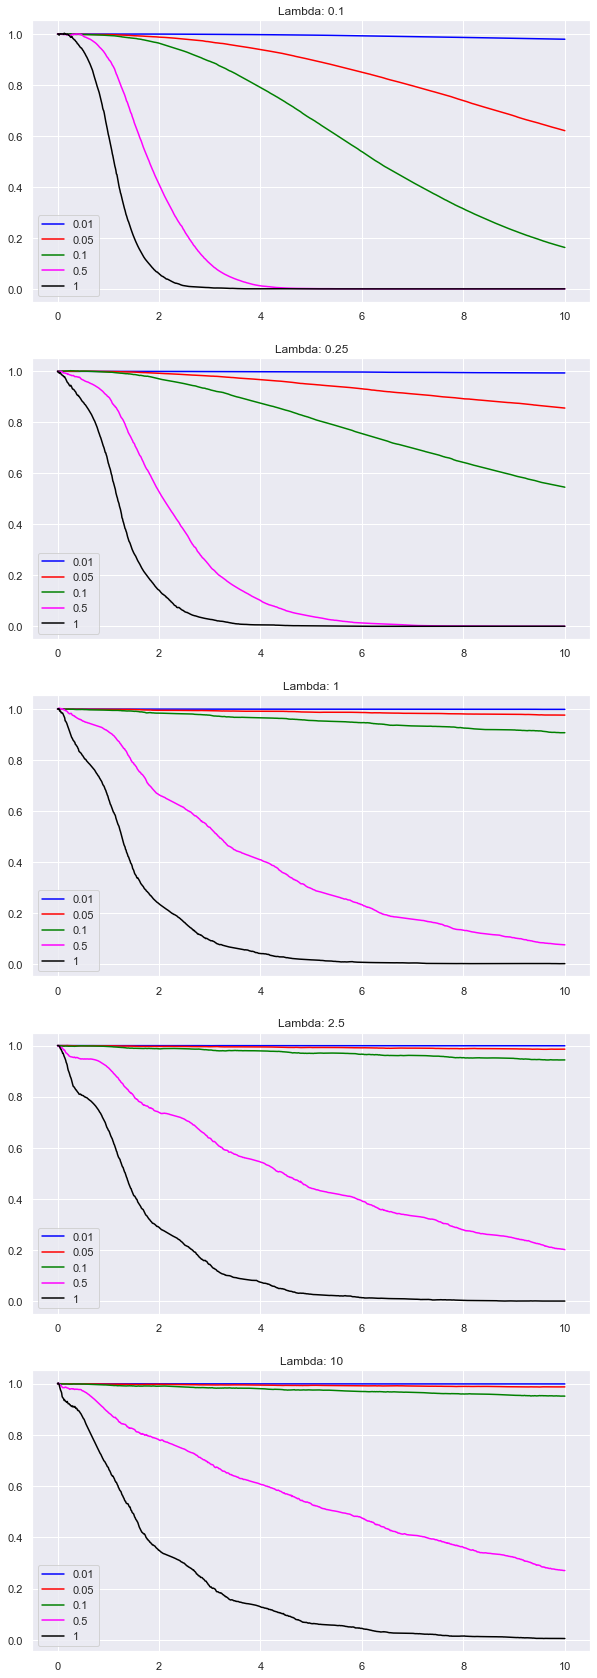

In [75]:
fig, axs = plt.subplots(5, figsize = (10,30))

t = np.linspace(0,10, int(10/0.01) + 1)

for i, r in enumerate(mean_trajectories_r):
    if r[1] == 0.01:
        color = 'blue'
    elif r[1] == 0.05:
        color = 'red'
    elif r[1] == 0.1:
        color = 'green'
    elif r[1] == 0.5:
        color = 'magenta'
    elif r[1] == 1:
        color = 'black'
        
    if r[0] == 0.1:
        axs[0].plot(t, mean_trajectories_r[r][0]**2 + mean_trajectories_r[r][1]**2, label = r[1], color = color)
        axs[0].title.set_text('Lambda: ' + str(r[0]))
    if r[0] == 0.25:
        axs[1].plot(t, mean_trajectories_r[r][0]**2 + mean_trajectories_r[r][1]**2, label = r[1], color = color)
        axs[1].title.set_text('Lambda: ' + str(r[0]))
    if r[0] == 1:
        axs[2].plot(t, mean_trajectories_r[r][0]**2 + mean_trajectories_r[r][1]**2, label = r[1], color = color)
        axs[2].title.set_text('Lambda: ' + str(r[0]))
    if r[0] == 2.5:
        axs[3].plot(t, mean_trajectories_r[r][0]**2 + mean_trajectories_r[r][1]**2, label = r[1], color = color)
        axs[3].title.set_text('Lambda: ' + str(r[0]))
    if r[0] == 10:
        axs[4].plot(t, mean_trajectories_r[r][0]**2 + mean_trajectories_r[r][1]**2, label = r[1], color = color)
        axs[4].title.set_text('Lambda: ' + str(r[0]))

for i in range(5):
    axs[i].legend()

plt.show()

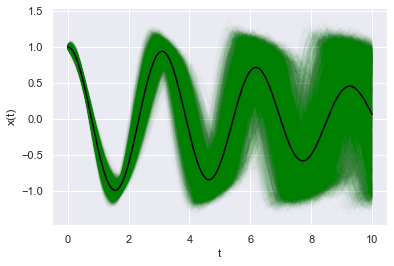

In [89]:
fig, ax = plt.subplots()
for r in rs_lam[(0.1, 0.1)]:
    ax.plot(t, r[:,0], alpha = 0.01, color = 'green')
ax.plot(t, mean_trajectories_r[(0.1,0.1)][0], color = 'black')
ax.set(xlabel = 't', ylabel = 'x(t)')
plt.show()

In [83]:
rs_lam[(0.1,0.5)][0][:,0]

array([1.        , 0.98516212, 0.94983085, ..., 0.70218612, 0.65228754,
       0.61763596])

In [120]:
rs_lam_01_001 = np.array(rs_lam[(0.1,0.01)])
rs_lam_01_005 = np.array(rs_lam[(0.1,0.05)])
rs_lam_01_01 = np.array(rs_lam[(0.1,0.1)])
rs_lam_01_05 = np.array(rs_lam[(0.1,0.5)])
rs_lam_01_1 = np.array(rs_lam[(0.1,1)])

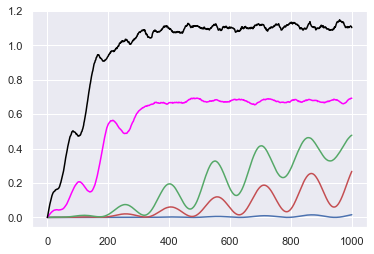

In [121]:
plt.plot(np.var(rs_lam_01_001[:,:,0],axis = 0), 'b')
plt.plot(np.var(rs_lam_01_005[:,:,0],axis = 0), 'r')
plt.plot(np.var(rs_lam_01_01[:,:,0],axis = 0), 'g')
plt.plot(np.var(rs_lam_01_05[:,:,0],axis = 0), 'magenta')
plt.plot(np.var(rs_lam_01_1[:,:,0],axis = 0), 'black')

In [130]:
rs_lam_025_1 = np.array(rs_lam[(0.25,1)])
rs_lam_1_1 = np.array(rs_lam[(1,1)])
rs_lam_25_1 = np.array(rs_lam[(2.5,1)])
rs_lam_10_1 = np.array(rs_lam[(10,1)])

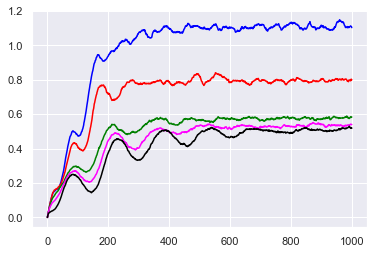

In [133]:
plt.plot(np.var(rs_lam_01_1[:,:,0],axis = 0), 'blue')
plt.plot(np.var(rs_lam_025_1[:,:,0],axis = 0), 'red')
plt.plot(np.var(rs_lam_1_1[:,:,0],axis = 0), 'green')
plt.plot(np.var(rs_lam_25_1[:,:,0],axis = 0), 'magenta')
plt.plot(np.var(rs_lam_10_1[:,:,0],axis = 0), 'black')

In [151]:
def digitize(trajectory, bins):
    x = trajectory[:,0]
    y = trajectory[:,1]
    counts, xedges, yedges = np.histogram2d(x, y, bins = bins)
    return counts/len(x)

def error(target_counts, noise_counts):
    return np.sqrt(sum(sum((target_counts - noise_counts)**2)))

bins = np.linspace(-1.1,1.1,101)

In [180]:
theta = np.linspace(0, 2*np.pi, 5001)
x_target = 1.0*np.cos(theta)
y_target = 1.0*np.sin(theta)
target_trajectory = np.hstack((x_target.reshape(x_target.size,1), y_target.reshape(y_target.size,1)))

In [186]:
target_digitized = digitize(target_trajectory, bins)

In [265]:
def error_traj(target_digitized, trajectories):
    error_vals = []
    for t in trajectories:
        tt = np.hstack((t[:,0].reshape(t[:,0].size,1), t[:,1].reshape(t[:,1].size,1)))
        error_vals.append(error(target_digitized, digitize(tt, bins)))
    return np.array(error_vals)

In [280]:
error_dict = {}
for rs in rs_lam.keys():
    print(rs)
    error_dict[rs] = error_traj(target_digitized, rs_lam[rs])

(0.1, 0.01)
(0.1, 0.05)
(0.1, 0.1)
(0.1, 0.5)
(0.1, 1)
(0.25, 0.01)
(0.25, 0.05)
(0.25, 0.1)
(0.25, 0.5)
(0.25, 1)
(1, 0.01)
(1, 0.05)
(1, 0.1)
(1, 0.5)
(1, 1)
(2.5, 0.01)
(2.5, 0.05)
(2.5, 0.1)
(2.5, 0.5)
(2.5, 1)
(10, 0.01)
(10, 0.05)
(10, 0.1)
(10, 0.5)
(10, 1)


In [296]:
lam_list = []
noise_list = []
error_list = []

for rs in error_dict.keys():
    error_list = error_list + list(error_dict[rs])
    lam_list = lam_list + len(error_dict[rs])*[rs[0]]
    noise_list = noise_list + len(error_dict[rs])*[rs[1]]

In [297]:
df = pd.DataFrame({'lambdas': lam_list, 'noise': noise_list, 'error': error_list})

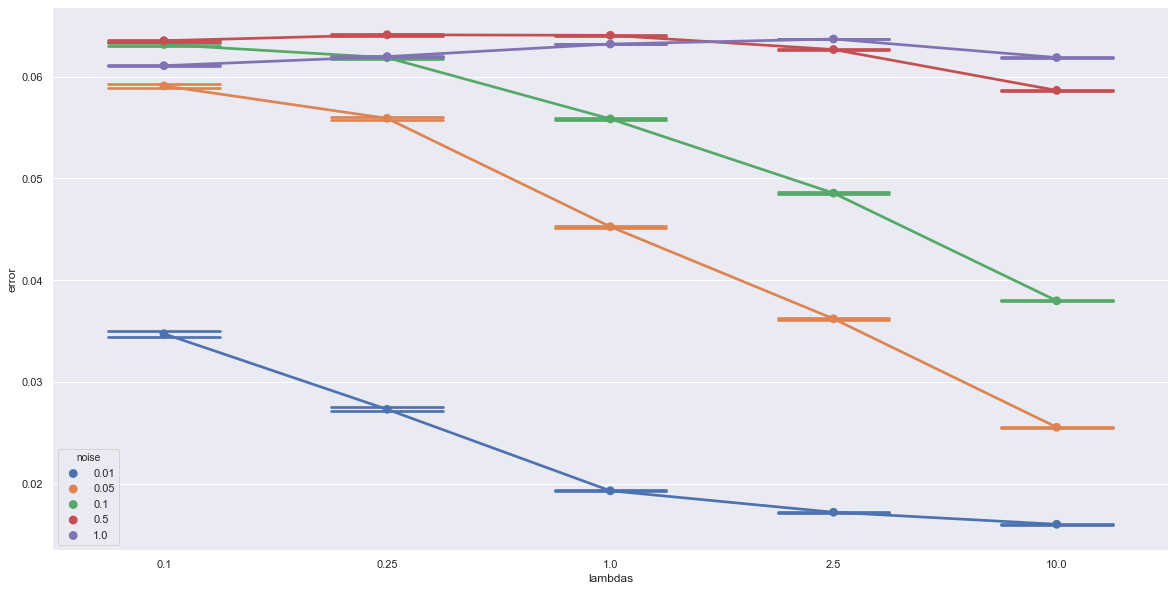

In [311]:
plt.figure(figsize = (20,10))
sns.pointplot(x = 'lambdas', y = 'error', data= df, hue = 'noise', ci = 95, capsize = 0.5)
plt.show()